# Speech Emotion Recognition

### Importing libraries

In [1]:
import librosa # used for sound and musical analysis
import soundfile # handling audio files
import os, glob # access files from folders, glob is used for acessing particular parsed files using filenames
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Feature Extraction
We are extracting three types of features for our audio dataset

In [2]:
def extract_feature(file_name):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate    
        result=np.array([])
        
        mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
        result=np.hstack((result, mfccs))
        
        stft=np.abs(librosa.stft(X))
        chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
        result=np.hstack((result, chroma))
        
        mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
        result=np.hstack((result, mel))
        
        tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T,axis=0)
        result = np.hstack((result, tonnetz))
            
    return result

In [3]:
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

emotions_to_be_observed=['happy','neutral','angry']
classes = ['happy','neutral','angry']

In [4]:
def load_data(test_size=0.2):
    i=0
    x,y=[],[]
    for file in glob.glob("C:/Users/nehak/Project 25- Speech Emotion Recognisation/Actor/Actor_*/*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in emotions_to_be_observed:
            continue
        feature=extract_feature(file)
        x.append(feature)
        y.append(emotion)
        print(i,emotion)
        i=i+1
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [5]:
X_train,X_test,Y_train,Y_test = load_data(test_size=0.20)

C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


0 neutral


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


1 neutral


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05  3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


2 neutral


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[3.0517578e-05 3.0517578e-05 0.0000000e+00 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


3 neutral
4 happy
5 happy


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0517578e-05 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


6 happy


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 3.0517578e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


7 happy
8 happy
9 happy
10 happy
11 happy
12 angry
13 angry


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


14 angry
15 angry


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[-0.00061035 -0.00048828 -0.00039673 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


16 angry


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[ 0.00231934  0.00213623 -0.00231934 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


17 angry


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[ 7.3242188e-04  1.0986328e-03 -6.7138672e-04 ...  9.1552734e-05
  3.6621094e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


18 angry


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[0.00033569 0.00024414 0.00024414 ... 0.00036621 0.00033569 0.00045776] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


19 angry
20 neutral
21 neutral


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00 0.0000000e+00
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


22 neutral
23 neutral
24 happy
25 happy
26 happy
27 happy
28 happy


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


29 happy
30 happy
31 happy


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


32 angry


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


33 angry
34 angry
35 angry


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0517578e-05 3.0517578e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


36 angry
37 angry
38 angry
39 angry


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[-3.0517578e-05  0.0000000e+00  0.0000000e+00 ...  6.1035156e-05
  3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


40 neutral


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05 -3.0517578e-05 ... -3.0517578e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


41 neutral
42 neutral


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[6.1035156e-05 3.0517578e-05 0.0000000e+00 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


43 neutral


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[ 6.1035156e-05  6.1035156e-05  9.1552734e-05 ... -3.0517578e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


44 happy


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[ 5.1879883e-04 -6.1035156e-05 -4.2724609e-04 ...  0.0000000e+00
 -9.1552734e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


45 happy
46 happy
47 happy
48 happy


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[ 1.2207031e-04  1.5258789e-04 -3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


49 happy


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[-0.00027466 -0.00024414 -0.00027466 ... -0.00015259 -0.00021362
 -0.00024414] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


50 happy


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[-9.1552734e-05 -9.1552734e-04 -1.0986328e-03 ...  2.7465820e-04
  3.0517578e-04  3.6621094e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


51 happy


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[-1.2207031e-04 -3.0517578e-05  0.0000000e+00 ...  3.0517578e-05
  9.1552734e-05  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


52 angry
53 angry


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -9.1552734e-05
 -1.8310547e-04  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


54 angry


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[-9.1552734e-05 -3.0517578e-05  3.0517578e-05 ... -5.8593750e-03
 -5.8898926e-03 -6.0729980e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


55 angry


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[-1.8310547e-04  1.2207031e-04  3.0517578e-04 ... -1.8310547e-04
 -6.1035156e-05 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


56 angry


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[ 6.4086914e-04  2.7465820e-04 -6.1035156e-05 ... -1.7089844e-03
 -1.8615723e-03 -1.8005371e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


57 angry


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[9.1552734e-05 2.1362305e-04 3.3569336e-04 ... 0.0000000e+00 3.0517578e-05
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


58 angry


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[3.0517578e-05 0.0000000e+00 3.0517578e-05 ... 9.4604492e-04 7.0190430e-04
 8.8500977e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


59 angry
60 neutral
61 neutral
62 neutral
63 neutral
64 happy
65 happy
66 happy
67 happy


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.1035156e-05 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


68 happy


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


69 happy
70 happy


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[3.0517578e-05 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


71 happy
72 angry
73 angry
74 angry


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[3.0517578e-05 6.1035156e-05 6.1035156e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


75 angry
76 angry


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.1035156e-05 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


77 angry
78 angry
79 angry
80 neutral


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
 -3.0517578e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


81 neutral


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[-6.1035156e-05 -9.1552734e-05 -6.1035156e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


82 neutral


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[ 6.1035156e-05  3.0517578e-05  6.1035156e-05 ... -9.1552734e-05
 -6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


83 neutral


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[3.0517578e-05 3.0517578e-05 3.0517578e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


84 happy
85 happy
86 happy


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
 -6.1035156e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


87 happy
88 happy


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0517578e-05 6.1035156e-05
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


89 happy


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[-1.5258789e-04 -1.5258789e-04 -1.5258789e-04 ...  0.0000000e+00
  3.0517578e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


90 happy


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05 -3.0517578e-05 ...  3.0517578e-05
  6.1035156e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


91 happy


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -3.0517578e-05 ... -3.0517578e-05
 -6.1035156e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


92 angry
93 angry


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00 3.0517578e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


94 angry
95 angry
96 angry


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -9.1552734e-05 ...  4.2724609e-04
  4.2724609e-04  4.2724609e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


97 angry
98 angry
99 angry
100 neutral
101 neutral
102 neutral
103 neutral
104 happy
105 happy
106 happy


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[ 6.1035156e-05  6.1035156e-05  3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


107 happy


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  3.0517578e-05
 -3.0517578e-05  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


108 happy
109 happy


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


110 happy


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[3.0517578e-05 6.1035156e-05 3.0517578e-05 ... 6.1035156e-04 6.1035156e-04
 5.7983398e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


111 happy
112 angry


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[0.         0.         0.         ... 0.00015259 0.00015259 0.00018311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


113 angry
114 angry
115 angry
116 angry


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[ 8.2397461e-04  5.1879883e-04  3.0517578e-04 ... -3.0517578e-05
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


117 angry


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[-3.0517578e-05  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


118 angry


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[ 9.1552734e-05 -3.0517578e-05 -4.8828125e-04 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


119 angry


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[-3.0517578e-05  3.0517578e-05  3.0517578e-05 ...  9.1552734e-05
  3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


120 neutral


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[-2.1362305e-04 -1.8310547e-04  6.1035156e-05 ... -1.5258789e-04
 -1.8310547e-04 -2.4414062e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


121 neutral


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[-6.1035156e-05 -1.2207031e-04  3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


122 neutral


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[ 6.1035156e-05  3.0517578e-05 -3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


123 neutral
124 happy
125 happy


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[-6.1035156e-05  0.0000000e+00  3.0517578e-05 ...  2.7465820e-04
  2.4414062e-04  2.7465820e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


126 happy
127 happy


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -3.0517578e-05 ...  6.1035156e-05
  9.1552734e-05  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


128 happy


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[ 2.1362305e-04  7.9345703e-04 -1.2207031e-04 ...  6.1035156e-05
  6.1035156e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


129 happy


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[-6.1035156e-05 -3.0517578e-05 -6.1035156e-05 ... -3.3569336e-04
 -3.9672852e-04 -4.2724609e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


130 happy


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[-3.0517578e-05  4.2724609e-04  6.4086914e-04 ...  1.2207031e-04
  9.1552734e-05  1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


131 happy


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05  3.0517578e-05 ... -8.2397461e-04
 -8.2397461e-04 -8.2397461e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


132 angry


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[ 6.1035156e-05  9.1552734e-05  1.2207031e-04 ... -2.1057129e-03
 -2.1362305e-03 -2.1362305e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


133 angry
134 angry
135 angry


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[-0.00064087 -0.00057983 -0.00054932 ...  0.00231934  0.00228882
  0.00228882] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


136 angry


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[ 0.00012207  0.00015259  0.00012207 ... -0.00204468 -0.00201416
 -0.00204468] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


137 angry


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -1.8310547e-04 ...  3.0517578e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


138 angry


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05  3.0517578e-05 ... -3.3569336e-04
 -3.3569336e-04 -3.3569336e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


139 angry


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[-0.00015259 -0.00015259 -0.00015259 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


140 neutral


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[9.1552734e-05 9.1552734e-05 1.2207031e-04 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


141 neutral


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05 -3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


142 neutral


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[0.00018311 0.00018311 0.00021362 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


143 neutral


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[6.1035156e-05 6.1035156e-05 6.1035156e-05 ... 9.1552734e-05 6.1035156e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


144 happy


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -3.0517578e-05 ...  3.0517578e-05
  3.0517578e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


145 happy


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[ 6.1035156e-05  6.1035156e-05  3.0517578e-05 ... -1.5258789e-04
 -1.2207031e-04 -1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


146 happy


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[3.0517578e-05 6.1035156e-05 3.0517578e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


147 happy


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[-9.1552734e-05 -6.1035156e-05 -6.1035156e-05 ...  6.1035156e-05
  3.0517578e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


148 happy
149 happy


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[ 9.1552734e-05  9.1552734e-05  9.1552734e-05 ... -3.6621094e-04
 -3.6621094e-04 -3.6621094e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


150 happy


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[-6.1035156e-05 -3.0517578e-05 -6.1035156e-05 ... -2.7465820e-04
 -2.1362305e-04 -1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


151 happy


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -6.1035156e-05 ... -8.5449219e-04
 -6.4086914e-04  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


152 angry


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05  0.0000000e+00 ... -2.4414062e-04
 -2.1667480e-03 -2.4414062e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


153 angry


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[-9.1552734e-05 -9.1552734e-05 -9.1552734e-05 ...  0.0000000e+00
  6.1035156e-05  1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


154 angry


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[-0.00018311 -0.00018311 -0.00018311 ...  0.00027466  0.00027466
  0.00018311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


155 angry


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[ 0.00018311  0.00015259  0.00018311 ... -0.00021362 -0.00018311
 -0.00015259] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


156 angry
157 angry


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[0.00012207 0.00012207 0.00012207 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


158 angry


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[1.8310547e-04 1.8310547e-04 1.8310547e-04 ... 3.0517578e-05 0.0000000e+00
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


159 angry


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[ 8.5449219e-04  8.5449219e-04  8.8500977e-04 ... -6.1035156e-05
 -6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


160 neutral
161 neutral
162 neutral
163 neutral
164 happy


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[ 9.1552734e-05  1.2207031e-04  1.2207031e-04 ... -3.0517578e-05
 -6.1035156e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


165 happy
166 happy
167 happy


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[0.0007019  0.00067139 0.00067139 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


168 happy


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -3.0517578e-05 ... -1.2207031e-04
 -1.2207031e-04 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


169 happy


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -6.1035156e-05
 -9.1552734e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


170 happy


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[-6.1035156e-05  3.0517578e-05  3.0517578e-05 ...  6.1035156e-05
 -3.0517578e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


171 happy


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0517578e-05 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


172 angry
173 angry
174 angry


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00012207 -0.00012207
 -0.00015259] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


175 angry


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05  0.0000000e+00 ... -2.7465820e-04
 -3.0517578e-04 -2.7465820e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


176 angry


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[ 3.0517578e-05  0.0000000e+00  0.0000000e+00 ... -1.5258789e-04
 -1.2207031e-04 -2.1362305e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


177 angry


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[9.1552734e-05 1.2207031e-04 1.8310547e-04 ... 1.5258789e-04 1.8310547e-04
 1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


178 angry


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[ 0.00027466  0.00048828  0.0005188  ... -0.00036621 -0.00042725
 -0.00033569] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


179 angry


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[6.1035156e-05 3.0517578e-05 6.1035156e-05 ... 0.0000000e+00 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


180 neutral


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05  2.7465820e-04 ...  6.1035156e-05
  9.1552734e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


181 neutral


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -6.1035156e-05 ...  0.0000000e+00
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


182 neutral


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[ 9.1552734e-05  9.1552734e-05  9.1552734e-05 ... -3.0517578e-05
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


183 neutral
184 happy


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[ 3.0517578e-05  0.0000000e+00  0.0000000e+00 ... -6.1035156e-05
 -6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


185 happy


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[ 3.0517578e-05  0.0000000e+00  3.0517578e-05 ...  0.0000000e+00
 -9.1552734e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


186 happy


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  3.0517578e-05 ...  3.9672852e-04
  4.5776367e-04 -2.7465820e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


187 happy


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[-2.7465820e-04  1.8310547e-04 -6.1035156e-05 ...  9.1552734e-05
  1.2207031e-04  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


188 happy


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -3.0517578e-05 ... -3.0517578e-05
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


189 happy


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05  3.0517578e-05 ...  0.0000000e+00
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


190 happy


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05  0.0000000e+00 ...  0.0000000e+00
  0.0000000e+00  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


191 happy


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[ 3.0517578e-05 -3.0517578e-05 -2.1362305e-04 ...  0.0000000e+00
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


192 angry


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[-1.5258789e-04  6.1035156e-05  1.5258789e-04 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


193 angry


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -3.0517578e-05 ...  3.0517578e-05
  3.0517578e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


194 angry


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[ 6.4086914e-04  2.7465820e-04 -4.5776367e-04 ...  1.2207031e-04
  9.1552734e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


195 angry


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[0.0000000e+00 1.5258789e-04 1.2207031e-04 ... 3.0517578e-05 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


196 angry


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[1.5258789e-04 1.5258789e-04 1.8310547e-04 ... 3.0517578e-05 3.0517578e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


197 angry


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[-3.0517578e-05  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


198 angry


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[-9.1552734e-05  3.0517578e-05  6.1035156e-05 ... -3.0517578e-05
  6.1035156e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


199 angry


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.1035156e-05 6.1035156e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


200 neutral
201 neutral
202 neutral


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -6.1035156e-05 ...  4.5776367e-04
  4.5776367e-04  4.5776367e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


203 neutral


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[-9.1552734e-05 -9.1552734e-05 -6.1035156e-05 ... -3.0517578e-05
 -6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


204 happy


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05  3.0517578e-05 ... -3.0517578e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


205 happy


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[3.0517578e-05 3.0517578e-05 3.0517578e-05 ... 6.1035156e-05 6.1035156e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


206 happy


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 9.1552734e-05 6.1035156e-05
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


207 happy


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 9.1552734e-05 9.1552734e-05
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


208 happy


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -3.0517578e-05 ...  3.0517578e-05
  2.1362305e-04  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


209 happy
210 happy


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[1.2207031e-04 9.1552734e-05 9.1552734e-05 ... 1.8310547e-04 1.8310547e-04
 1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


211 happy


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[6.1035156e-05 9.1552734e-05 9.1552734e-05 ... 3.0517578e-05 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


212 angry
213 angry


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[-1.2207031e-04 -1.5258789e-04 -1.5258789e-04 ...  6.1035156e-05
  6.1035156e-05  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


214 angry
215 angry


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[-3.0517578e-05 -6.1035156e-05 -6.1035156e-05 ...  3.0517578e-05
  3.0517578e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


216 angry
217 angry


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00027466 -0.00027466
 -0.00027466] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


218 angry


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[-1.2207031e-04 -9.1552734e-05 -6.1035156e-05 ... -1.2207031e-04
 -9.1552734e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


219 angry
220 neutral
221 neutral
222 neutral
223 neutral
224 happy
225 happy
226 happy


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0517578e-05 3.0517578e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


227 happy


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05  0.0000000e+00 ...  3.0517578e-05
  3.0517578e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


228 happy


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00021362 -0.00024414
 -0.00018311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


229 happy


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


230 happy
231 happy
232 angry
233 angry


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05  0.0000000e+00 ... -3.0517578e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


234 angry
235 angry


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00152588 -0.00149536
 -0.00149536] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


236 angry


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[0.         0.         0.         ... 0.00283813 0.0027771  0.0027771 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


237 angry


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -6.1035156e-05
 -6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


238 angry


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00021362 -0.00027466
 -0.00024414] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


239 angry


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05  0.0000000e+00 ... -6.1035156e-05
 -3.0517578e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


240 neutral
241 neutral


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05  0.0000000e+00 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


242 neutral
243 neutral
244 happy
245 happy


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -6.1035156e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


246 happy
247 happy
248 happy


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[ 6.1035156e-05  3.0517578e-05  3.0517578e-05 ... -6.1035156e-05
 -9.1552734e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


249 happy
250 happy
251 happy


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0517578e-05 0.0000000e+00
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


252 angry
253 angry
254 angry


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[-3.0517578e-05  0.0000000e+00 -3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


255 angry
256 angry
257 angry


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[-3.0517578e-05  0.0000000e+00  0.0000000e+00 ... -7.9345703e-04
 -8.2397461e-04 -8.2397461e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


258 angry


C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[0.         0.         0.         ... 0.00012207 0.00012207 0.00015259] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


259 angry


In [6]:
print((X_train.shape[0], X_test.shape[0]))

(208, 52)


In [7]:
print(f'Features extracted: {X_train.shape[1]}')

Features extracted: 186


In [8]:
d = {'happy':0,'neutral':1,'angry':2}
y_test = [d[x] for x in Y_test]
y_train = [d[x] for x in Y_train]
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)
print(y_train.shape,y_test.shape)

(208, 3) (52, 3)


In [9]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(X_train)
x_test = ss.transform(X_test)

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.callbacks import EarlyStopping
# Build a simple dense model with early stopping and softmax for categorical classification, remember we have 30 classes
model = Sequential()
model.add(Dense(186, input_shape=(186,), activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation = 'softmax'))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [11]:
history = model.fit(x_train, y_train, batch_size=64, epochs=150, 
                    validation_data=(x_test, y_test))

Epoch 1/150
4/4 [==============================] - 0s 50ms/step - loss: 1.3571 - accuracy: 0.3221 - val_loss: 0.9295 - val_accuracy: 0.5769
Epoch 2/150
4/4 [==============================] - 0s 8ms/step - loss: 1.0579 - accuracy: 0.4423 - val_loss: 0.8261 - val_accuracy: 0.5769
Epoch 3/150
4/4 [==============================] - 0s 10ms/step - loss: 0.9242 - accuracy: 0.5577 - val_loss: 0.7594 - val_accuracy: 0.6154
Epoch 4/150
4/4 [==============================] - 0s 12ms/step - loss: 0.8321 - accuracy: 0.6106 - val_loss: 0.7129 - val_accuracy: 0.6346
Epoch 5/150
4/4 [==============================] - 0s 10ms/step - loss: 0.7931 - accuracy: 0.5962 - val_loss: 0.6950 - val_accuracy: 0.6346
Epoch 6/150
4/4 [==============================] - 0s 10ms/step - loss: 0.7691 - accuracy: 0.6058 - val_loss: 0.6755 - val_accuracy: 0.6538
Epoch 7/150
4/4 [==============================] - 0s 9ms/step - loss: 0.6922 - accuracy: 0.6731 - val_loss: 0.6593 - val_accuracy: 0.6731
Epoch 8/150
4/4 [=====

4/4 [==============================] - 0s 7ms/step - loss: 0.0886 - accuracy: 0.9712 - val_loss: 0.4320 - val_accuracy: 0.8269
Epoch 60/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0677 - accuracy: 0.9904 - val_loss: 0.4161 - val_accuracy: 0.8462
Epoch 61/150
4/4 [==============================] - 0s 6ms/step - loss: 0.0590 - accuracy: 0.9952 - val_loss: 0.4136 - val_accuracy: 0.8462
Epoch 62/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0624 - accuracy: 0.9904 - val_loss: 0.4127 - val_accuracy: 0.8462
Epoch 63/150
4/4 [==============================] - 0s 9ms/step - loss: 0.0479 - accuracy: 0.9952 - val_loss: 0.4141 - val_accuracy: 0.8462
Epoch 64/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0495 - accuracy: 0.9904 - val_loss: 0.4355 - val_accuracy: 0.8269
Epoch 65/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0444 - accuracy: 0.9904 - val_loss: 0.4525 - val_accuracy: 0.8269
Epoch 66/150
4/4 [===============

4/4 [==============================] - 0s 8ms/step - loss: 0.0138 - accuracy: 1.0000 - val_loss: 0.5684 - val_accuracy: 0.8269
Epoch 118/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0202 - accuracy: 0.9952 - val_loss: 0.5889 - val_accuracy: 0.8269
Epoch 119/150
4/4 [==============================] - 0s 9ms/step - loss: 0.0264 - accuracy: 1.0000 - val_loss: 0.5986 - val_accuracy: 0.8269
Epoch 120/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0098 - accuracy: 0.9952 - val_loss: 0.5986 - val_accuracy: 0.8269
Epoch 121/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0195 - accuracy: 1.0000 - val_loss: 0.5750 - val_accuracy: 0.8269
Epoch 122/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0131 - accuracy: 1.0000 - val_loss: 0.5586 - val_accuracy: 0.8269
Epoch 123/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.5561 - val_accuracy: 0.8269
Epoch 124/150
4/4 [========

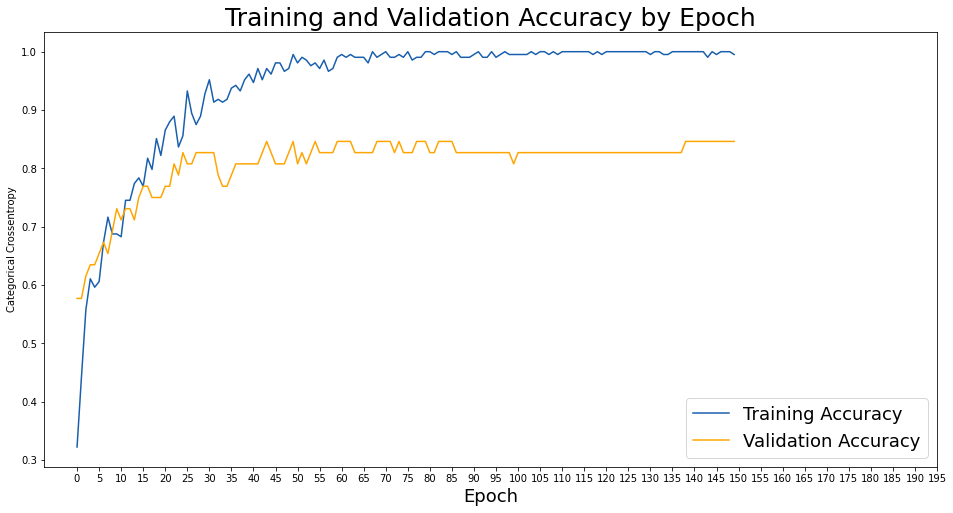

In [12]:
import matplotlib.pyplot as plt

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
# Set figure size.
plt.figure(figsize=(16, 8))
# Generate line plot of training, testing loss over epochs.
plt.plot(train_accuracy, label='Training Accuracy', color='#185fad')
plt.plot(val_accuracy, label='Validation Accuracy', color='orange')
# Set title
plt.title('Training and Validation Accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 10)
plt.xticks(range(0,200,5), range(0,200,5))
plt.legend(fontsize = 18);

In [13]:
from sklearn.metrics import classification_report
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=-1)
y_test_classes = y_test.argmax(axis=-1)
print(classification_report( y_test_classes, y_pred_classes ))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        18
           1       0.67      0.86      0.75         7
           2       0.92      0.85      0.88        27

    accuracy                           0.85        52
   macro avg       0.81      0.85      0.82        52
weighted avg       0.86      0.85      0.85        52



### Listen to the audios and predict by model

In [14]:
pip install SpeechRecognition

Note: you may need to restart the kernel to use updated packages.


In [15]:
import speech_recognition as sr
r = sr.Recognizer()

In [16]:
pip install sounddevice

Note: you may need to restart the kernel to use updated packages.


In [17]:
import sounddevice as sd
import soundfile as sf

In [18]:
def playfile(filename):
    data, fs = sf.read(filename, dtype='float32')  
    sd.play(data, fs)
    status = sd.wait()

In [19]:
playfile("03-01-02-02-01-02-15.wav")

In [20]:
def predict(model,test_input):
    y_pred = model.predict(ss.transform(np.array([extract_feature(test_input)])))
    y_pred_class = y_pred.argmax(axis=-1)
    return classes[y_pred_class[0]]

In [21]:
predict(model, "03-01-02-02-01-02-15.wav")

C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[-9.1552734e-05 -9.1552734e-05 -9.1552734e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


'happy'

In [22]:
predict(model, "03-01-02-01-02-01-02.wav")

C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


'neutral'

In [23]:
playfile("03-01-03-02-02-01-06.wav")

In [24]:
predict(model, "03-01-03-02-02-01-06.wav")

C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


'happy'

In [25]:
playfile("03-01-05-02-02-01-18.wav")

In [26]:
predict(model, "03-01-05-02-02-01-18.wav")

C:\Users\nehak\AppData\Local\Temp\ipykernel_30148\3133690979.py:14: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


'angry'